<a href="https://colab.research.google.com/github/alexnodejs/bandit/blob/main/HT_22-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [2]:
!pip install -q kneed

In [3]:
sum_total = df.isnull().sum()

print(f"Total missed values: {sum_total}")

Total missed values: ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [4]:
df = df.drop('ID', axis=1)
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [7]:

scaler = StandardScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df)
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...,...
1995,1.724257,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.725989,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,1.727721,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.729453,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)

kmeans.fit(data)

KMeans(n_clusters=2)

In [ ]:
kmeans.inertia_

6561.1421308243525

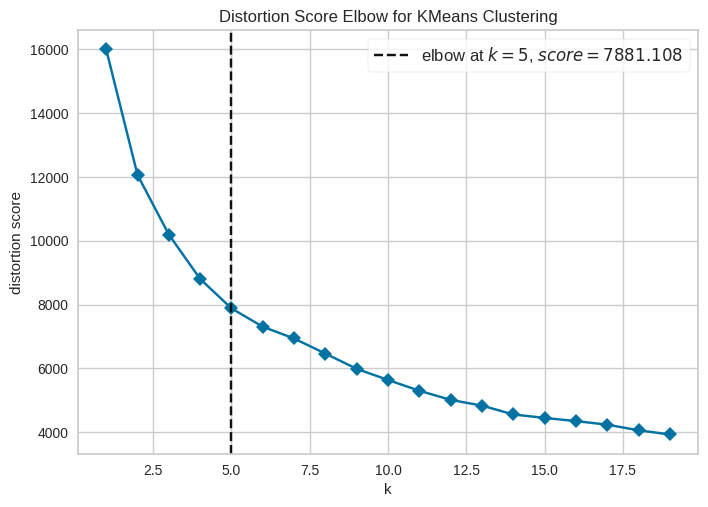

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion',
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

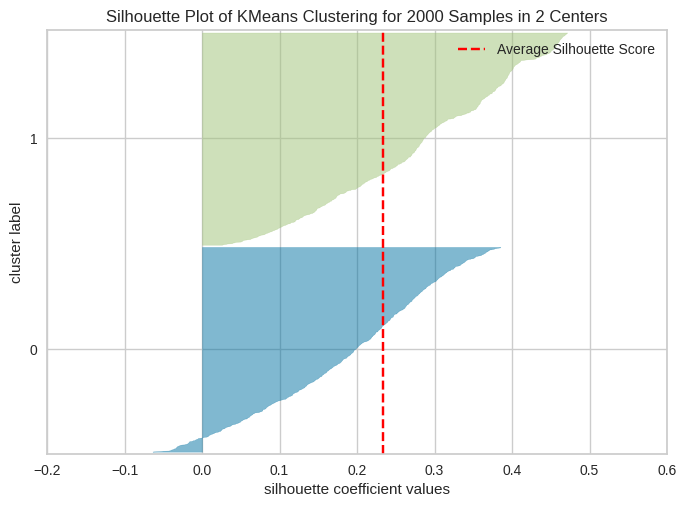

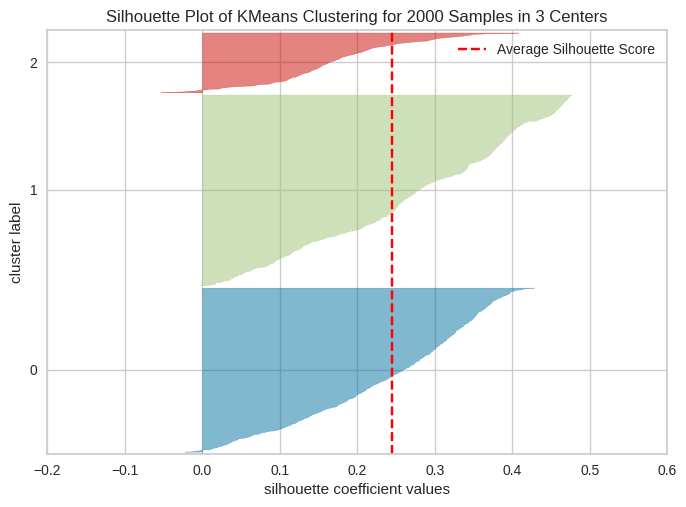

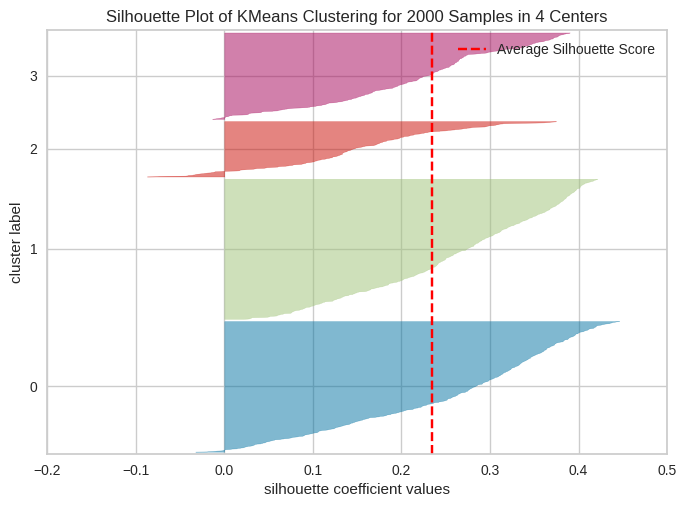

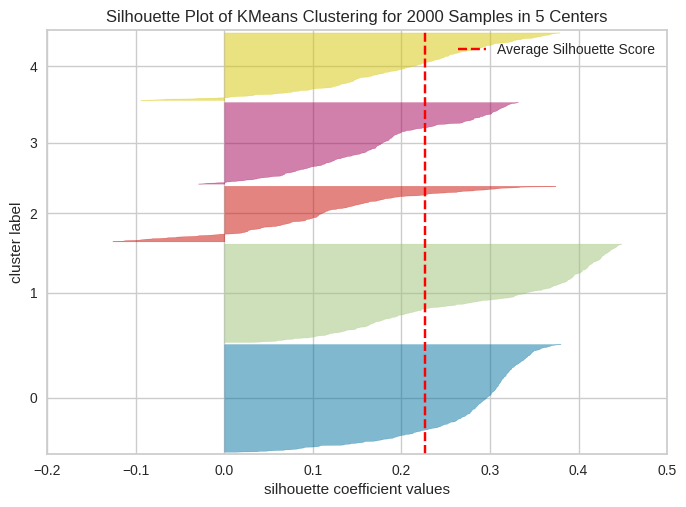

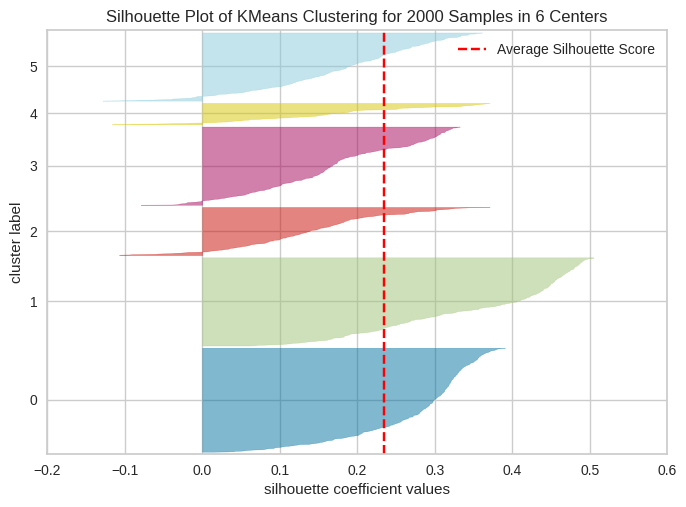

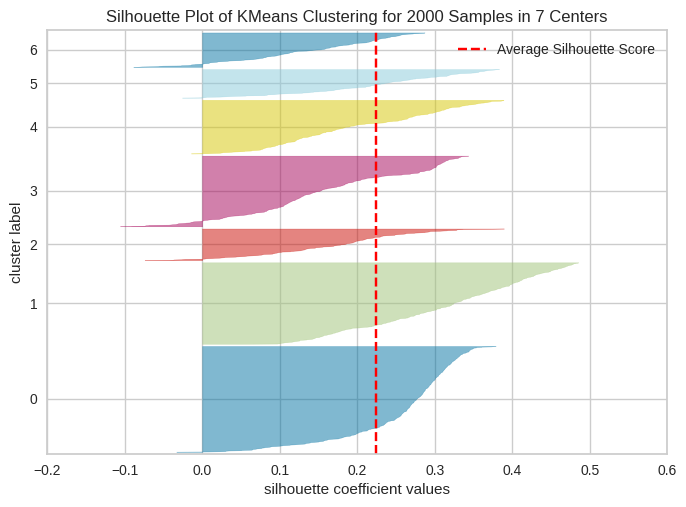

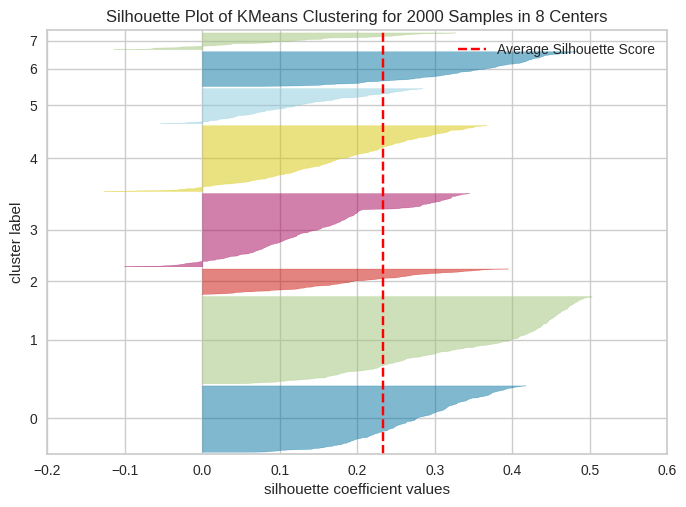

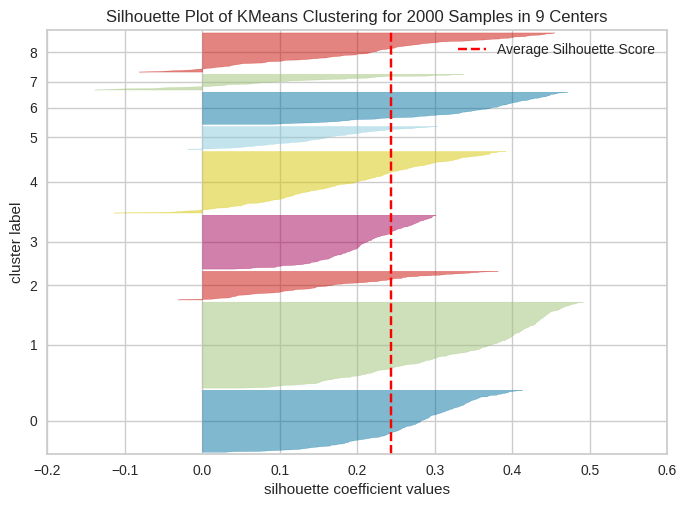

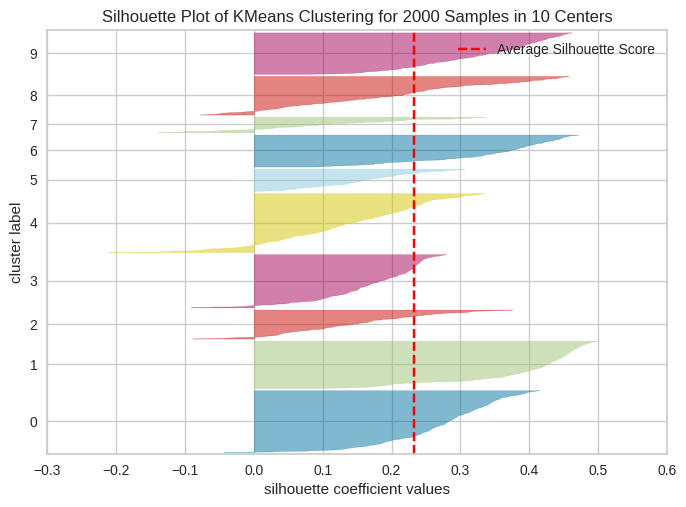

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

for n_clusters in range(2, 11):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(data)
    visualizer.show()